In [90]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
from IPython.display import Latex
import scipy as sc
import sympy as sp

### Determinacion de los modos elásticos en una viga empotrada

Soluciones de 
$$\cosh(x)*cos(x)+1=0$$

Si $\beta_n L$ son sus raíces, las frecuencias resultan:

$\omega _{1}=\beta _{1}^{2}{\sqrt {\frac {EI}{\mu }}}={\frac {3.5160}{L^{2}}}{\sqrt {\frac {EI}{\mu }}}~,~~\dots $

In [91]:
#Determinacion de los modos elásticos
#en una viga empotrada

x, y, z = sp.symbols('x y z')
eq1 = sp.diff(sp.cos(x)*sp.cosh(x)+1, x)
def fun_modn (x):
    return np.cosh(x)*np.cos(x)+1
    
callable_fct = sp.lambdify(x, eq1)

x_s = np.linspace(1,15,200)
y_s = np.zeros_like(x_s)
for i,xi in enumerate(x_s):
    y_s[i] = fun_modn(xi)
signo_s = np.sign(y_s)
diff_signo_s = np.diff(signo_s)
x0s = x_s[np.nonzero(diff_signo_s)]

BnL = np.zeros_like(x0s)
for i,x0i in enumerate(x0s):
    BnL[i] = sc.optimize.fsolve(fun_modn,x0i,fprime=callable_fct)[0]
display(Latex(f'Las raíces son $\\beta_1 L={BnL[0]:.3f}$, $\\beta_2 L={BnL[1]:.3f},\\ldots$'  )    )

<IPython.core.display.Latex object>

In [92]:
#deformacion elastica viga empotrada
def w_n (Bn,x,A1=1,L=1):
    wn = A1*((np.cosh(Bn*x)-np.cos(Bn*x))+(np.cos(Bn*L)+np.cosh(Bn*L))/(np.sin(Bn*L)+np.sinh(Bn*L))*(np.sin(Bn*x)-np.sinh(Bn*x)))
    return wn

In [93]:
# Define un objeto lamina flexible, con sus propiedades mecánicas
class material:
    def __init__(self, name,th,rho,lstuart):
        g = 9.8
        self.name = name
        self.thickness = th*1e-6
        self.rho = rho
        self.lstuart = lstuart*1e-3
        self.B =  ((lstuart*1e-3*1.103)**3)*rho*th*1e-6*g # rigidez a la flexion por unidad de longitud
        self.I = (th*1e-6)**3/12  #momento de inercia por unidad de longitud
        self.E = self.B / self.I
        self.L = 1

        self.mu = self.rho  * self.thickness
        #calculo modo empotrado

        x_s = np.linspace(1,15,200)
        y_s = np.zeros_like(x_s)
        for i,xi in enumerate(x_s):
            y_s[i] = fun_modn(xi)
        signo_s = np.sign(y_s)
        diff_signo_s = np.diff(signo_s)
        x0s = x_s[np.nonzero(diff_signo_s)]

        BnL = np.zeros_like(x0s)
        for i,x0i in enumerate(x0s):
            BnL[i] = sc.optimize.fsolve(fun_modn,x0i,fprime=callable_fct)[0]
        self.BnL = BnL
        self.BetaL = BnL[0]
    def freq_nat(self):
        self.beta,self.fn = np.tile(np.zeros_like(self.BnL),[2,1])
        for i,BnLi in enumerate(self.BnL):
            self.beta[i] = BnLi/self.L
            Bni = BnLi/self.L
            self.fn[i] = Bni**2*(self.B/self.mu)**0.5/2/np.pi
        
        
    def update_modo(self,nselect):
        
        self.BetaL = BnL[nselect-1]
        print(nselect)       

In [94]:
# Datos del Papel, 
Ym = 85
t = 100
dens_sup = 80
rho_papel = dens_sup/(t*1e-6)*1e-3
Papel_80 = material('Papel 80gr/m2',t,rho_papel,Ym)
B = Papel_80.B
rho = rho_papel
k1L = BnL[0]
k2L = BnL[1]
L = 150e-3
Papel_80.L = L
Papel_80.freq_nat()
display(Latex(f'${{f_n}}_1= {Papel_80.fn[0]:.3f}$Hz'))
display(Latex(f'${{f_n}}_2= {Papel_80.fn[1]:.3f}$Hz'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Ho Huerre (1984) Ann Rev
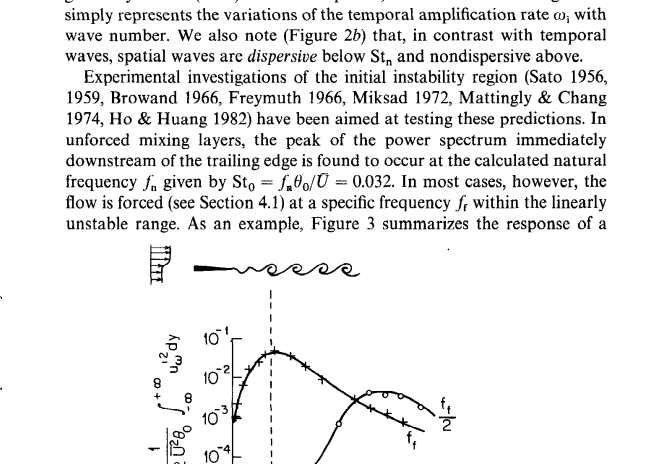

$St_0 = f_{KH}*\theta_0/U_m = 0.032$

$\theta_0$: momentum thickness

$U_m=(U_1+U_2)/2$: mean velocity

$f_{kh}$ Kelvin Helmoltz shear later non forced frequency

In [95]:
U1 = 18
U2 = 0
f_kh = Papel_80.fn[1]  
Um = (U1+U2)/2

#supongo fkh sincroniza con la del papel
#pienso que debe ser el segundo modo de deformacion elástica, por el largo y las curvaturas, habría que confirmar con foto

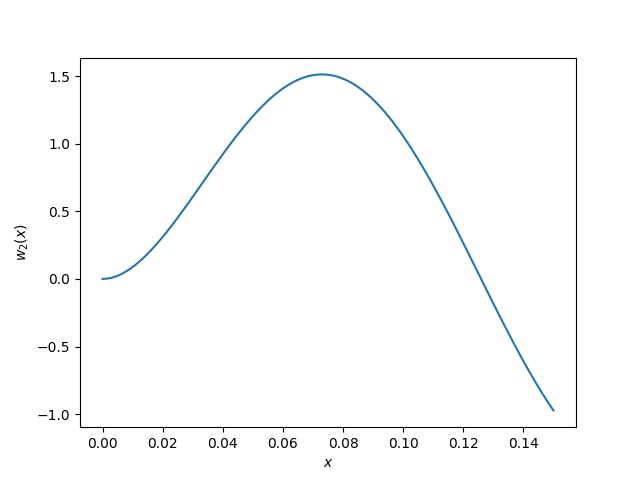

In [96]:
# 2 modo deformacion elástica
fig,ax = plt.subplots()
x = np.linspace(0,Papel_80.L,100)
ax.plot(x,w_n(Papel_80.BnL[1]/Papel_80.L,x))
ax.set_xlabel('$x$')
ax.set_ylabel('$w_2(x)$');

In [97]:
theta0 = 0.032*Um/f_kh
display(Latex(f'El espesor de capa límite $\\simeq${theta0*1e3:.3f}mm'))

<IPython.core.display.Latex object>